In [27]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import time
import os
from tqdm import tqdm

import torchvision.transforms as transforms
import torchvision.models as models
import torchvision

import torch.nn as nn
import torch

In [28]:
transform_dict = {
        'train': transforms.Compose(
            [transforms.Resize((256,256)),
             transforms.CenterCrop(224),
             transforms.RandomHorizontalFlip(),
             transforms.ToTensor(),
             transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
             ]),
        'test': transforms.Compose(
            [transforms.Resize((256,256)),
             transforms.CenterCrop(224),
             transforms.ToTensor(),
             transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
             ])}

In [29]:
data_folder = "../../dataset/moeimouto-faces"
phase = "train"

data = torchvision.datasets.ImageFolder(root=data_folder, transform=transform_dict[phase])

In [30]:
train_ratio = 0.8

train_size = int(train_ratio * len(data))
val_size  = len(data) - train_size
data_size  = {"train":train_size, "val":val_size}
print(data_size)
data_train, data_val = torch.utils.data.random_split(data, [train_size, val_size])

{'train': 11517, 'val': 2880}


In [31]:
batch_size = 4
train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, shuffle=True)
val_loader   = torch.utils.data.DataLoader(data_val,   batch_size=batch_size, shuffle=False)
dataloaders  = {"train":train_loader, "val":val_loader}

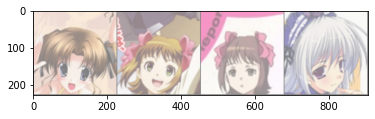

tensor(148) tensor(63) tensor(63) tensor(104)


In [36]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 訓練データをランダムに取得
dataiter = iter(dataloaders["train"])
images, labels = dataiter.next()

# 画像の表示
imshow(torchvision.utils.make_grid(images))
# ラベルの表示
print(' '.join('%5s' % labels[j] for j in range(4)))